**Data Loading and Preprocessing**

First, Let us load the dataset. In this example, we'll use the MNIST dataset, which contains images of handwritten digits (0-9).

In [3]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Preprocessing involves scaling the pixel values to a range between 0 and 1, as neural networks work better with input values in this range:

In [4]:
# Normalize pixel values to a range of 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

**Data Splitting**

Split the data into training (60%), cross-validation (20%), and test (20%) sets:

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), cross-validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(train_images, train_labels, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Building the Model**

We will create a simple feedforward neural network with two hidden layers. The input layer will have 28x28 = 784 neurons (one for each pixel), and the output layer will have 10 neurons, one for each possible digit (0-9).

In [6]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D vector
    keras.layers.Dense(128, activation='relu'),   # 1st hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),    # 2nd hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons and softmax activation
])

**Model Compilation**

Compile the model by specifying the loss function, optimizer, and evaluation metrics:

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training**

Train the model using the training data and validate it using the cross-validation data:

In [ ]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_cv, y_cv))

**Model Evaluation**

Evaluate the model on the test data:

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

375/375 [==============================] - 1s 2ms/step - loss: 0.2354 - accuracy: 0.9753
Test Accuracy: 97.53%


**Confusion Matrix, Precision, Recall, Accuracy, F1 Score**

To calculate and visualize these metrics, you can use scikit-learn:

375/375 [==============================] - 1s 2ms/step


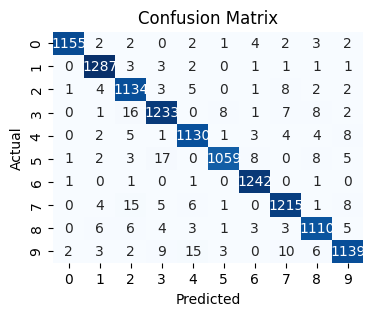

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1173
           1       0.98      0.99      0.99      1299
           2       0.96      0.98      0.97      1160
           3       0.97      0.97      0.97      1276
           4       0.97      0.98      0.97      1158
           5       0.99      0.96      0.97      1103
           6       0.98      1.00      0.99      1246
           7       0.97      0.97      0.97      1255
           8       0.97      0.97      0.97      1141
           9       0.97      0.96      0.96      1189

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Calculate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

To see some of the dataset examples with their actual labels and the labels predicted by the model (including the incorrect predictions), we can follow these steps:

**Predict Labels:**
Use the trained model to make predictions on a portion of the dataset.

**Compare Predictions:**
Compare the predicted labels to the actual labels in the dataset to identify incorrect predictions.

**Visualize Samples:**
Choose a few samples from the dataset that were incorrectly classified and display them alongside their actual and predicted labels.

375/375 [==============================] - 2s 4ms/step


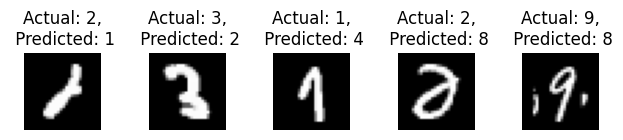

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Find the indices of incorrectly classified samples
incorrect_indices = np.where(y_pred != y_test)[0]

# Choose a random sample size to visualize
sample_size = 5
random_indices = np.random.choice(incorrect_indices, sample_size, replace=False)

# Create subplots
fig, axes = plt.subplots(1, sample_size, figsize=(sample_size*1.5, 1))

# Visualize the samples with actual and predicted labels side by side
for i, idx in enumerate(random_indices):
    # Get the actual and predicted labels
    actual_label = y_test[idx]
    predicted_label = y_pred[idx]

    # Display the image and labels
    axes[i].imshow(X_test[idx], cmap='gray')
    axes[i].set_title(f'Actual: {actual_label},\n Predicted: {predicted_label}')
    axes[i].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the subplots
plt.show()